# Exercise 00 : Line chart

## Problems for this exercise

* make a connection to the database (it is the same as the previous day)
* run a query that gets the datetime from the pageviews table, selecting only the
users and not the admins
* using Pandas, create a new dataframe where the visits are counted and grouped by
date
* using Pandas method .plot(), create a graph
    * the size of the font should be 8
    * the size of the figure is (15,8)
    * the graph must have the title Views per day
    * notice the rotation of xticks on the graph below
* close the connection to the database

### Импорт разрешенных библиотек

In [7]:
import pandas as pd
import sqlite3

## Подключаемся к базе данных

In [8]:
connection = sqlite3.connect("./data/checking-logs.sqlite")

## Получаем нужные данные

In [9]:
query = '''
        SELECT datetime
        FROM pageviews
        WHERE uid LIKE '%user_%'
        '''
pageviews = pd.read_sql(con=connection, sql=query, parse_dates=["datetime"])

## Подсчёт количества посещений в зависимости от даты

In [10]:
df = pageviews.groupby(by=pageviews["datetime"].dt.date).count()
df.rename(columns={"datetime": "views"}, inplace=True)

## Строим график

<Axes: title={'center': 'Views per day'}, xlabel='date'>

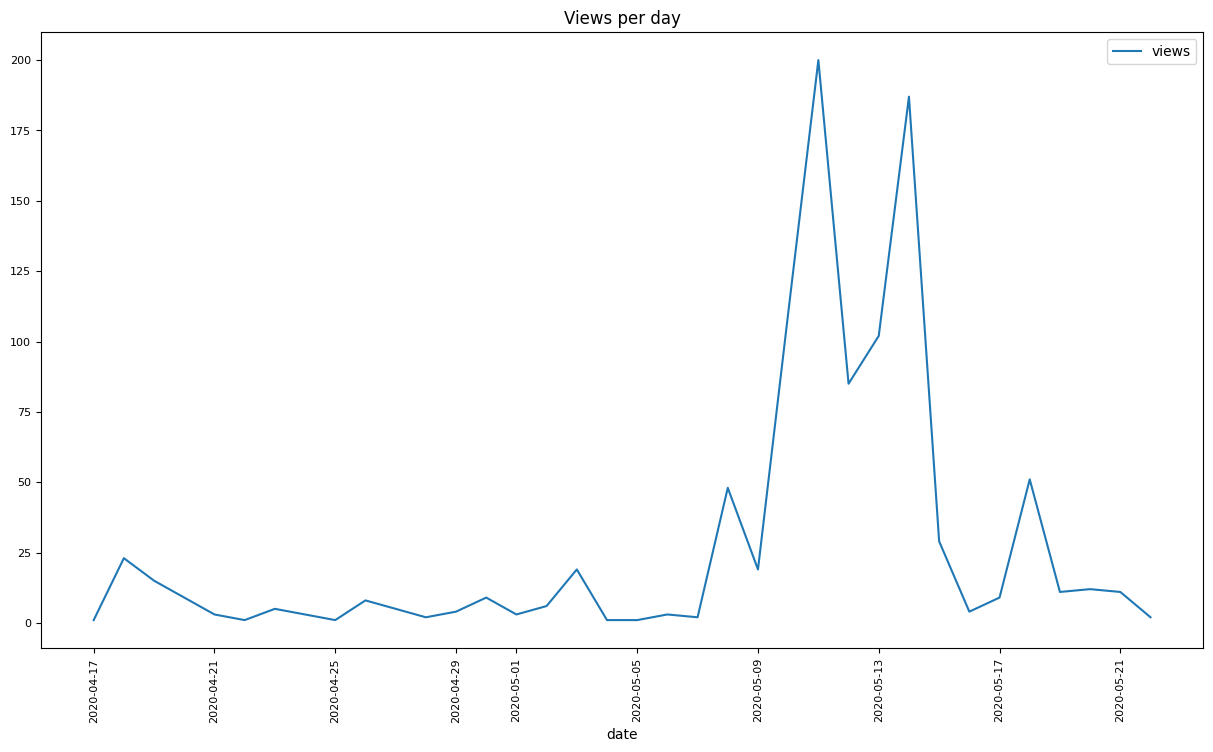

In [11]:
df.plot(use_index=True, y="views", title="Views per day", xlabel="date", figsize=(15,8), fontsize=8, rot=90)

## Закрываем подлючение к базе данных

In [12]:
connection.close()

# Exercise 01 : Line chart with styles

## Problems for this exercise

Remember that we have the data about the commits? Wouldn’t it be cool to draw both of the metrics in time on the same graph? What if we will see some patterns?

* you need to create exactly the same graph as below (both values and style):

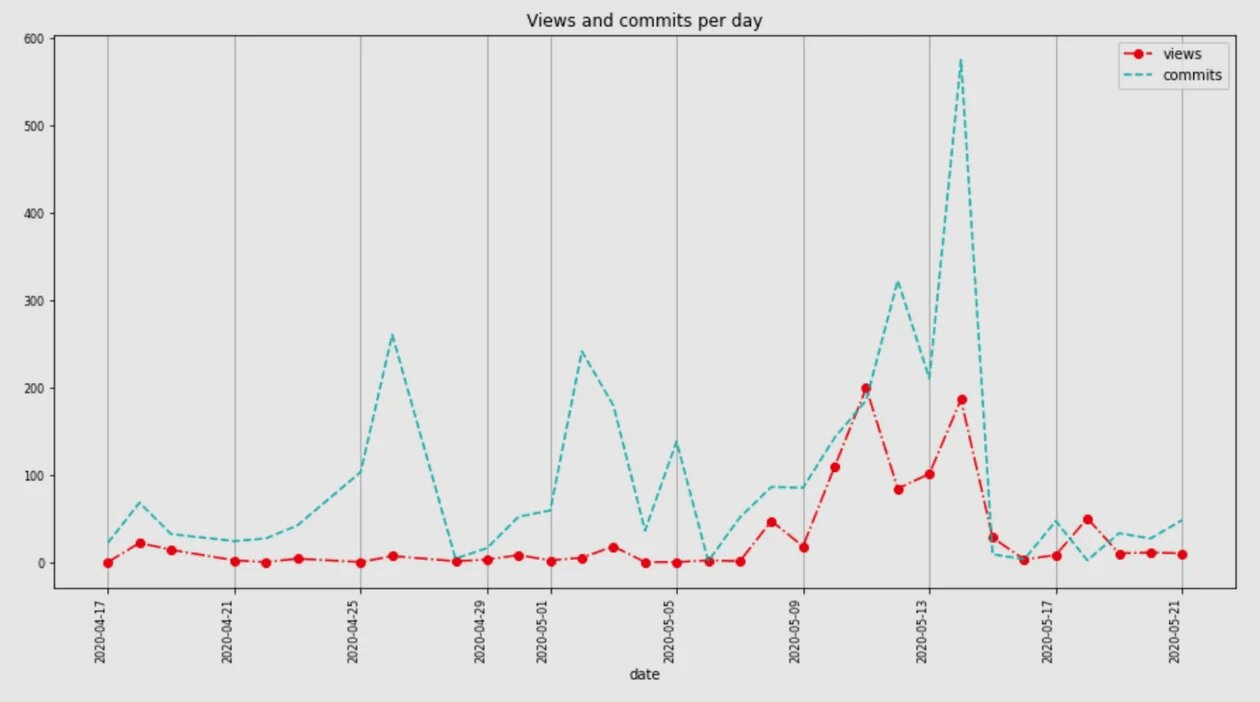

* analyze only the users and not the admins
* analyze only the dates when there were both views and checker commits
* use size of the font should be 8
* the size of the figure is (15,8)
* at the end of your Jupyter Notebook create a markdown cell and insert the question:
    * “How many times was the number of views larger than 150?” Insert: “The answer is ___”. Put the number in the text instead of the underline

### Импорт разрешенных функций

In [19]:
import pandas as pd
import sqlite3

## Подключаемся в базе данных

In [20]:
connection = sqlite3.connect("./data/checking-logs.sqlite")

## Получаем данные через SQL-запрос из pageviews

In [21]:
query = '''
        SELECT datetime
        FROM pageviews
        WHERE uid LIKE '%user_%';
        '''
graph_1_info = pd.read_sql(con=connection, sql=query, parse_dates=["datetime"])
grouped_data_1 = graph_1_info.groupby(by=graph_1_info["datetime"].dt.date).count()
grouped_data_1.rename(columns={"datetime": "views"}, inplace=True)
grouped_data_1

,views
datetime,
2020-04-17,1
2020-04-18,23
2020-04-19,15
2020-04-21,3
2020-04-22,1
2020-04-23,5
2020-04-25,1
2020-04-26,8
2020-04-28,2


## Получаем данные через SQL-запрос из checker

In [22]:
query = '''
        SELECT timestamp
        FROM checker
        WHERE uid LIKE '%user_%'
        '''
graph_2_info = pd.read_sql(con=connection, sql=query, parse_dates=["timestamp"])
grouped_data_2 = graph_2_info.groupby(by=graph_2_info["timestamp"].dt.date).count()
grouped_data_2.rename(columns={"timestamp": "commits"}, inplace=True)
grouped_data_2

,commits
timestamp,
2020-04-17,23
2020-04-18,69
2020-04-19,33
2020-04-20,25
2020-04-21,25
2020-04-22,28
2020-04-23,43
2020-04-24,16
2020-04-25,104


## Совмещаем оба DataFrame с данными в один рисунок

<Axes: title={'center': 'Views and commits per day'}, xlabel='date'>

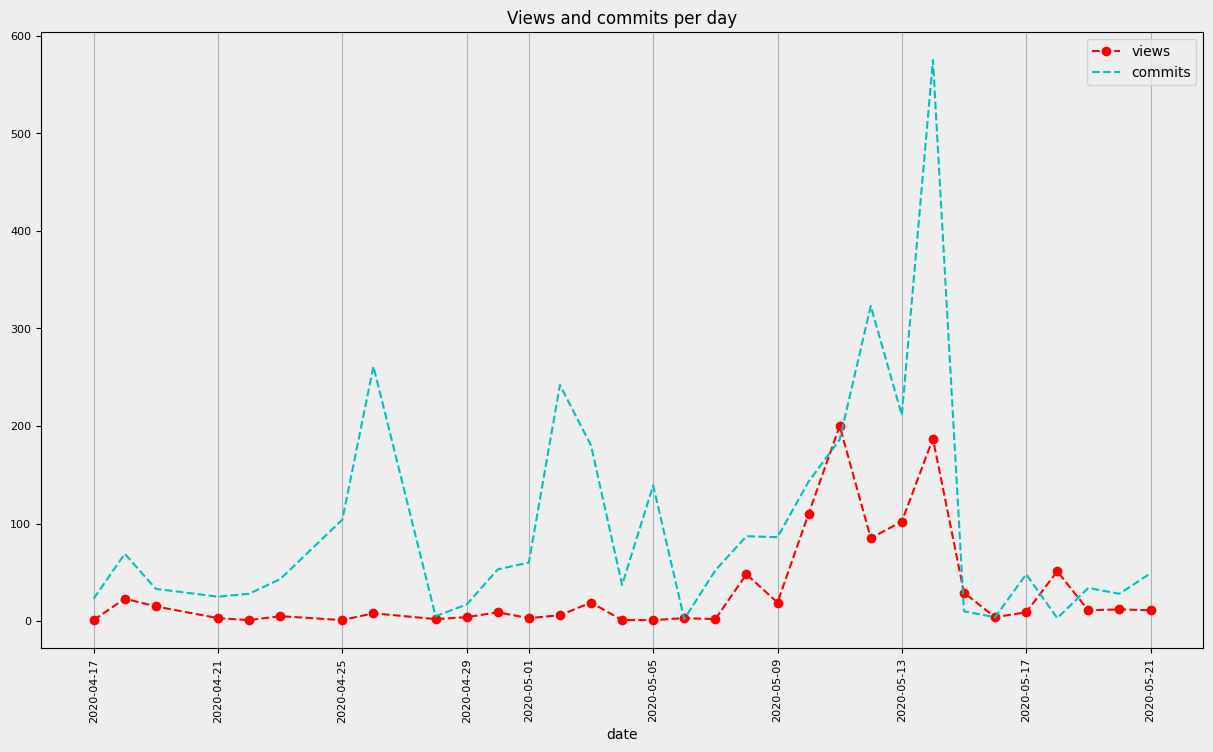

In [23]:
graph_info = grouped_data_1.join(other=grouped_data_2, how="inner")
graph = graph_info.plot(use_index=True, y=["views", "commits"], rot=90, title="Views and commits per day", xlabel="date", fontsize=8, figsize=(15,8), style=["r--o", "c--"])
graph.legend().get_frame().set_facecolor("#EEEEEE")
graph.figure.set_facecolor("#EEEEEE")
graph.set_facecolor("#EEEEEE")
graph.grid(axis='x')
graph

How many times was the number of views larger than 150?
<br>
The answer is 2

## Разрываем подключение с базой данных

In [24]:
connection.close()

# Exercise 02 : Bar

## Problems for this exercise

We have another question for you to answer: when do our users usually commit the labs: in the night, morning, afternoon, or evening? And how has it changed over time?

* Do what you need to do to create a graph like this:

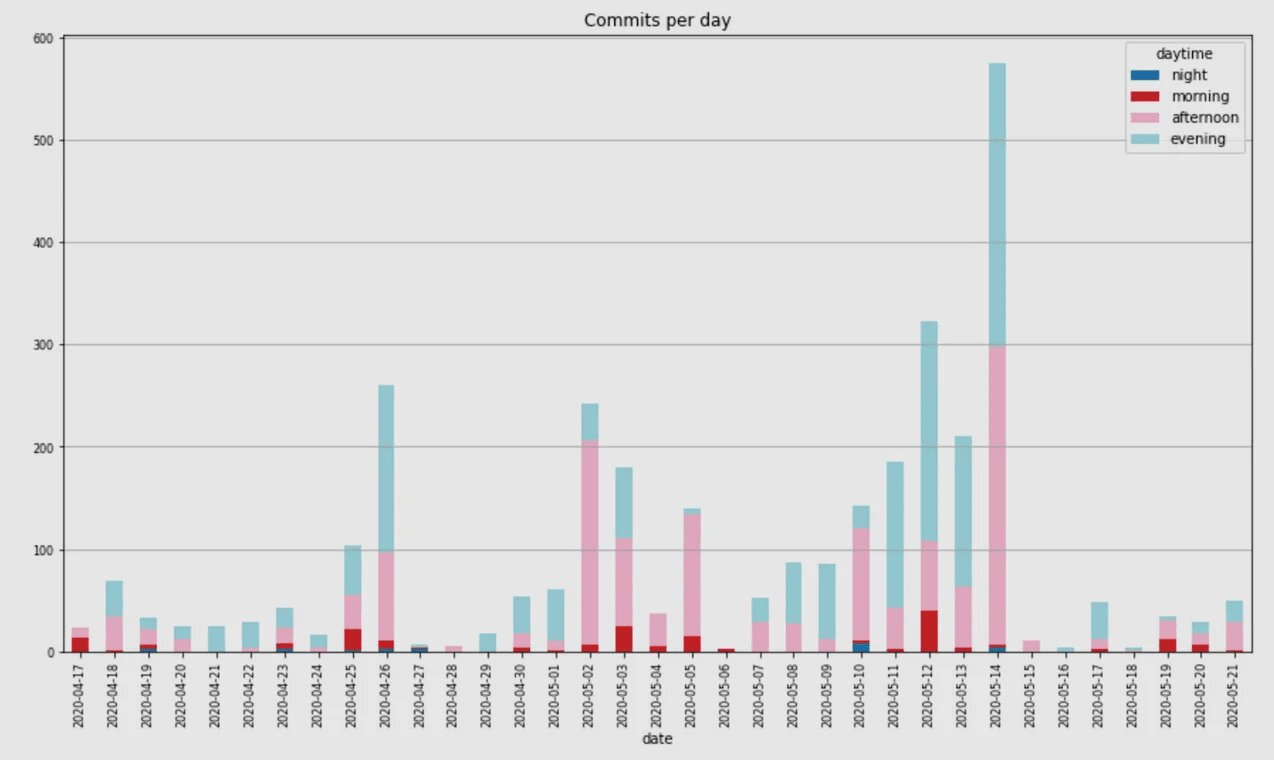

* analyze only the users and not the admins
* the fontsize and the figsize are still the same
* night is from 0:00:00 to 03:59:59, morning is from 04:00:00 to 09:59:59, afternoon is from 10:00:00 to 16:59:59, evening is from 17:00:00 to 23:59:59
* choose a palette that you really enjoy, you do not have to replicate it from the graph above
* at the end of your Jupyter Notebook, create a markdown cell and insert the questions:
    * “When do our users usually commit the labs: in the night, morning, afternoon, or evening?”, the answer is the two most common periods.
    * Which day has:
        * the most number of commits
        * and at the same time, the number of commits in the evening is higher than in the afternoon?

The answer is the date of that day

### Импорт разрешенных библиотек

In [3]:
import pandas as pd
import sqlite3

## Подключаемся к базе данных

In [4]:
connection = sqlite3.connect("./data/checking-logs.sqlite")

## Делаем запрос на получение нужной информации к базе данных

In [5]:
query = '''
        SELECT
            timestamp,
            CASE
                WHEN (0 <= hour) AND (hour < 4) THEN "night"
                WHEN (4 <= hour) AND (hour < 10) THEN "morning"
                WHEN (10 <= hour) AND (hour < 17) THEN "afternoon"
                ELSE "evening"
            END AS daytime
        FROM (SELECT
                    timestamp,
                    CAST(strftime("%H", timestamp) AS INTEGER) AS hour
              FROM checker
              WHERE uid LIKE "%user_%")
        '''
data = pd.read_sql(con=connection, sql=query, parse_dates=["timestamp"])

grouped_data = data.groupby(by=[data["timestamp"].dt.date, data["daytime"]]).count()
grouped_data.rename(columns={"timestamp": "values"}, inplace=True)

pivoted_data = grouped_data.pivot_table(index='timestamp', columns='daytime', values='values', fill_value=0)
pivoted_data

daytime,afternoon,evening,morning,night
timestamp,,,,
2020-04-17,10.0,0.0,13.0,0.0
2020-04-18,33.0,35.0,1.0,0.0
2020-04-19,16.0,11.0,4.0,2.0
2020-04-20,12.0,13.0,0.0,0.0
2020-04-21,0.0,25.0,0.0,0.0
2020-04-22,4.0,24.0,0.0,0.0
2020-04-23,15.0,20.0,6.0,2.0
2020-04-24,4.0,12.0,0.0,0.0
2020-04-25,33.0,49.0,21.0,1.0


## Строим график, задавая нужные параметры

<Axes: title={'center': 'Commits per day'}, xlabel='date'>

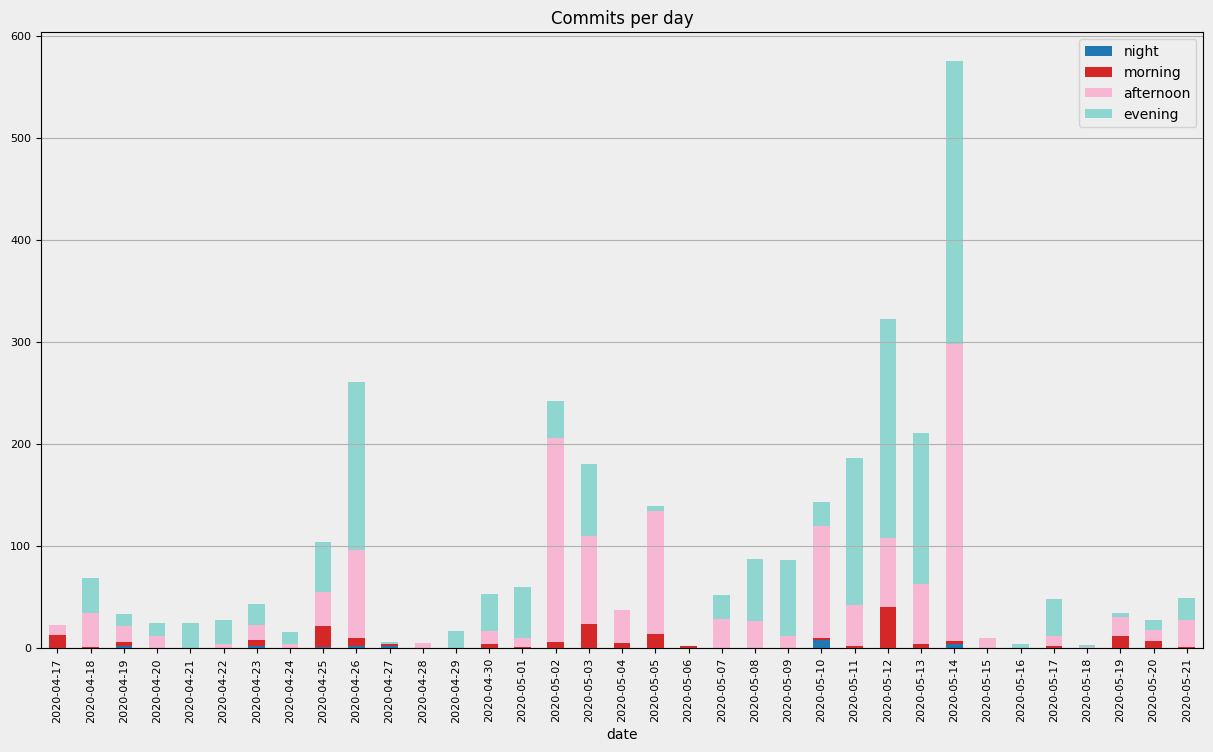

In [6]:
colors = ['#1f77b4', '#d62728', '#f7b6d2', '#8fd6d1']
graph = pivoted_data.plot(use_index=True, y=["night", "morning", "afternoon", "evening"], kind="bar", stacked=True, figsize=(15,8), color=colors, title="Commits per day", xlabel="date", fontsize=8)
graph.grid(axis='y')
graph.figure.set_facecolor("#EEEEEE")
graph.set_facecolor("#EEEEEE")
graph.legend().get_frame().set_facecolor("#EEEEEE")
graph

*When do our users usually commit the labs: in the night, morning, afternoon, or evening?*
<br>
Answer: **(afternoon, evening)**
<br>
*Which day has the most number of commits and at the same time, the number of commits in the evening is higher than in the afternoon?*
<br>
Answer: **2020-05-12**

## Разрываем подключение с базой данных

In [7]:
connection.close()

# Exercise 03 : Bar charts

### Импорт разрешенных библиотек 

In [1]:
import pandas as pd
import sqlite3

## Problems for the exercise

What if the average number of commits is different when it is a working day or weekend?

* do what you need to do to create a graph like this:

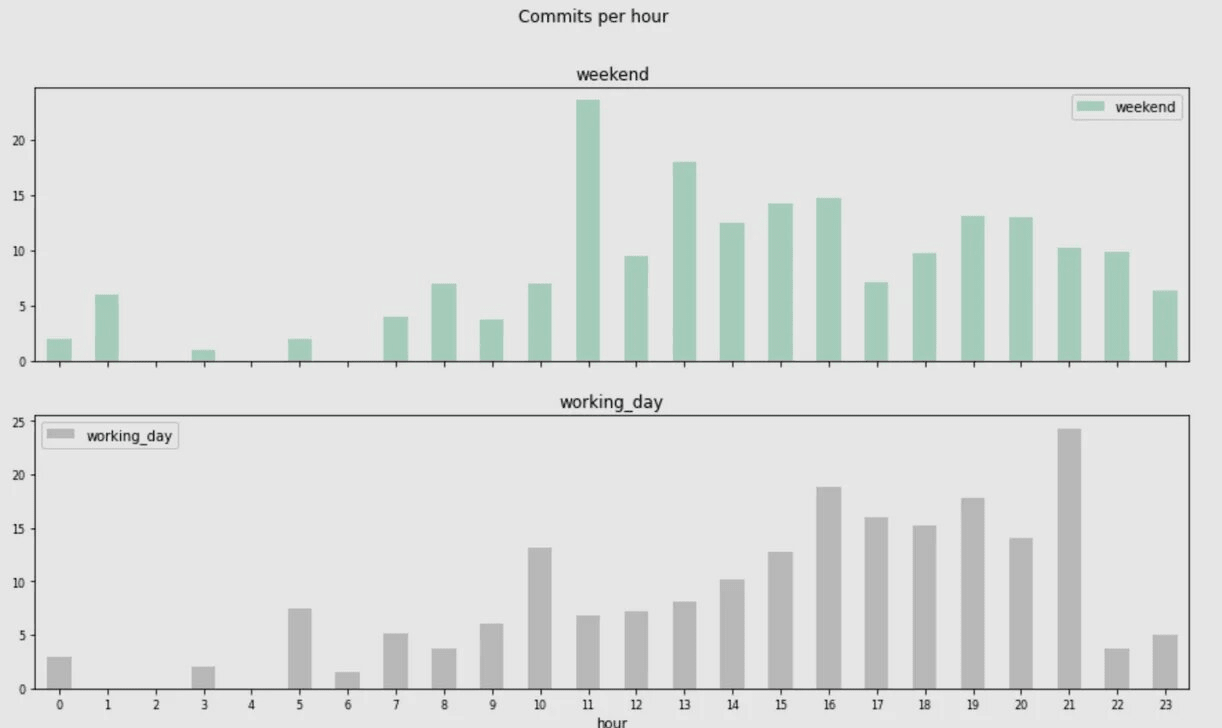

* analyze only the users and not the admins
* the fontsize and the figsize remain the same
* for each hour, calculate the average number of commits on working days and on
weekends (if there were no commits in an hour, do not use it to calculate the
average) use these values for your graph, for example: Mon, 17-18: 5 commits, Tue,
17-18: 6 commits, Wed, 17-18: 7 commits
* choose a palette that you really enjoy, you do not have to replicate it from the graph
above
* at the end of your Jupyter Notebook, create a markdown cell and insert the question
    * “Is the dynamic different on working days and weekends?”, for the answer include the hour when the number of commits is the largest during working days and the hour when it is the largest during the weekend.

## Подключаемся к базе данных

In [2]:
connection = sqlite3.connect("./data/checking-logs.sqlite")

## С помощью запроса к базе данных извлекаем данные в нужном виде

In [3]:
query = '''
        SELECT
            timestamp,
            CASE
                WHEN (CAST(strftime("%w", timestamp) AS INTEGER) IN (0, 6)) THEN "weekend"
                ELSE "working_day"
            END AS type
        FROM checker
        WHERE uid LIKE "%user_%";
        '''
data = pd.read_sql(con=connection, sql=query, parse_dates=["timestamp"])
data["date"] = data["timestamp"].dt.date
data["hour"] = data["timestamp"].dt.hour

counted_data = data.groupby(by=["type", "date", "hour"])["timestamp"].count().reset_index(name="values")

averaged_data = counted_data.groupby(by=["type", "hour"])["values"].mean().reset_index(name="avg_v")

all_types = ["weekend", "working_day"]
all_hours = range(24)
all_combinations = pd.MultiIndex.from_product([all_types, all_hours], names=["type", "hour"]).to_frame(index=False)

merged_data = pd.merge(all_combinations, averaged_data, on=["type", "hour"], how="left").fillna(0)

weekend_avg = merged_data[merged_data["type"] == "weekend"][["hour", "avg_v"]].rename(columns={"avg_v": "weekend"})
work_avg = merged_data[merged_data["type"] == "working_day"][["hour", "avg_v"]].rename(columns={"avg_v": "working_day"})

final_data = pd.merge(weekend_avg, work_avg, on="hour", how="left")
final_data

,hour,weekend,working_day
0,0,2.000000,3.000000
1,1,6.000000,0.000000
2,2,0.000000,0.000000
3,3,1.000000,2.000000
4,4,0.000000,0.000000
5,5,2.000000,7.500000
6,6,0.000000,1.500000
7,7,4.000000,5.166667
8,8,7.000000,3.700000
9,9,3.666667,6.000000


## Строим график на основе полученных данных

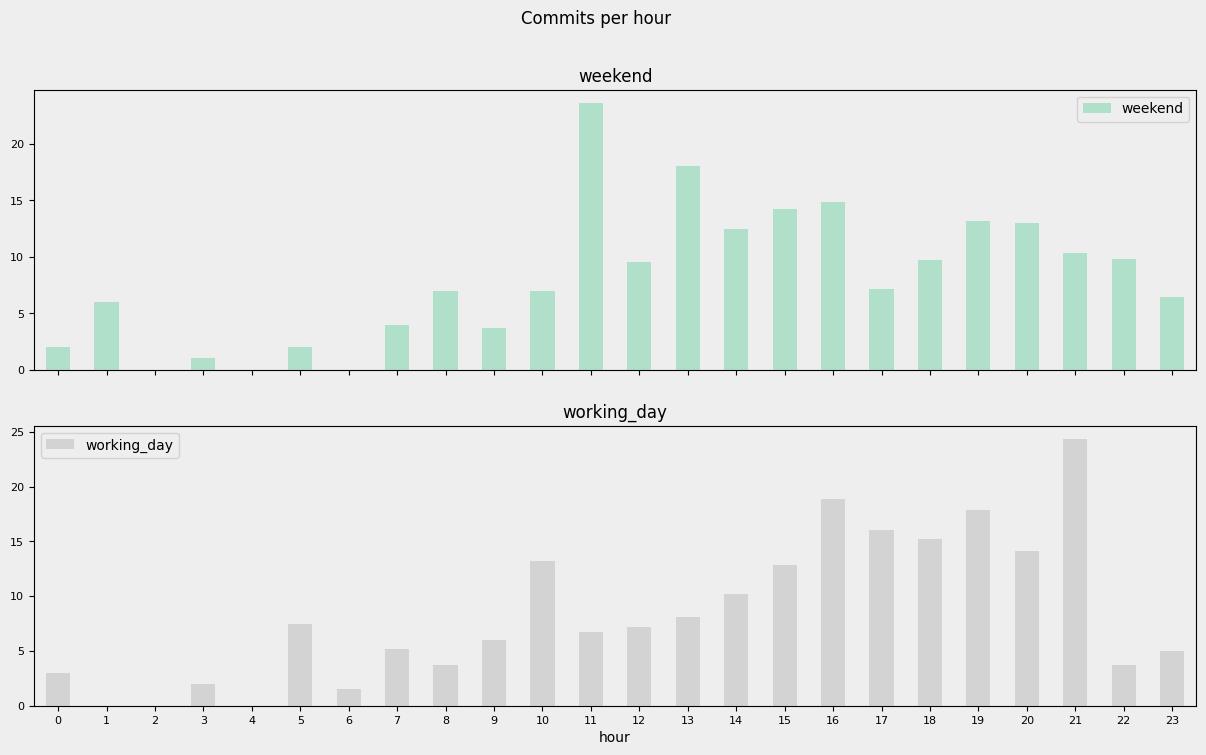

In [4]:
colors = ['#b0e0c9', '#d3d3d3']
graph = final_data.plot(x="hour", y=["weekend", "working_day"], kind="bar", color=colors, subplots=True, sharex=True, figsize=(15,8), fontsize=8, title="Commits per hour", rot=0)
for subplot in graph:
    subplot.set_facecolor("#EEEEEE")
graph[0].figure.set_facecolor("#EEEEEE")
graph[0].legend().get_frame().set_facecolor("#EEEEEE")
graph[1].legend().get_frame().set_facecolor("#EEEEEE")

Is the dynamic different on working days and weekends?
<br>
Answer: **(11 for weekend, 21 for working_day)**

## Закрываем соединение с базой данных

In [5]:
connection.close()

# Exercise 04 : Histogram

### Импорт разрешенных библиотек

In [2]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

## Problems for this exercise

In the previous exercise, you had to draw a distribution grouping the values using Pandas. Wouldn’t it be nice if we could draw it in a more automatic way? Well, we can. But we have to use another type of visualization – histograms. This time, we will not use the averages. We will use the absolute numbers of commits and will compare them during working days and weekends.

* do what you need to do to create a graph like this:

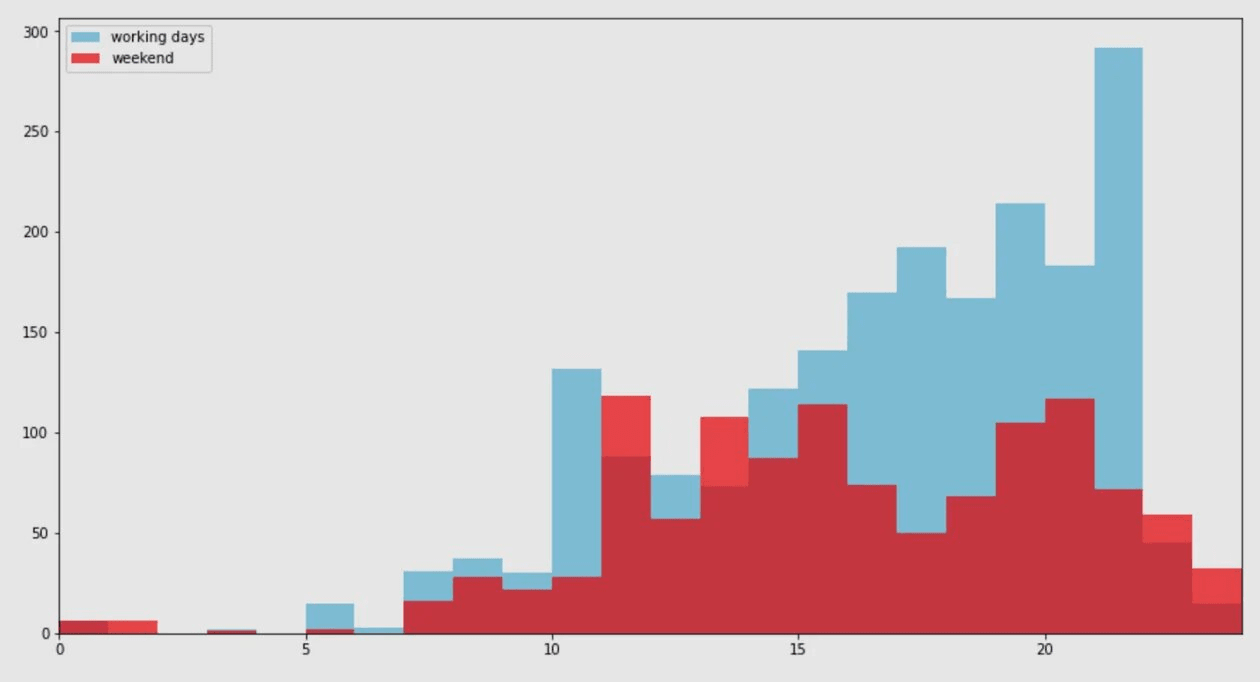

* analyze only the users and not the admins
* create two lists of values (for working days and for weekends) for the histogram input
* the figsize is still the same, you can choose the fontsize as well as the color palette
* use a level of transparency for the histogram in front equal to 0.7
* at the end of your Jupyter Notebook, create a markdown cell and insert the question:
    * “Are there hours when the total number of commits was higher on weekends than on working days?” In your answer, put the top-4 examples.

## Создаём подключение к базе данных 

In [3]:
connection = sqlite3.connect("./data/checking-logs.sqlite")

## С помощью SQL-запроса получаем из базы данных необходимую информацию

In [4]:
query = '''
        SELECT
            timestamp,
            CASE
                WHEN (CAST(strftime("%w", timestamp) AS INTEGER) IN (0, 6)) THEN 1
                ELSE 0
            END AS is_weekend
        FROM checker
        WHERE uid LIKE "%user_%";
        '''
data = pd.read_sql(con=connection, sql=query, parse_dates=["timestamp"])
data["hour"] = data["timestamp"].dt.hour
values_1, values_2 = data[data["is_weekend"] == 0]["hour"].to_list(), data[data["is_weekend"] == 1]["hour"].to_list()

## Создадим гистограму используя pyplot

(0.0, 24.0)

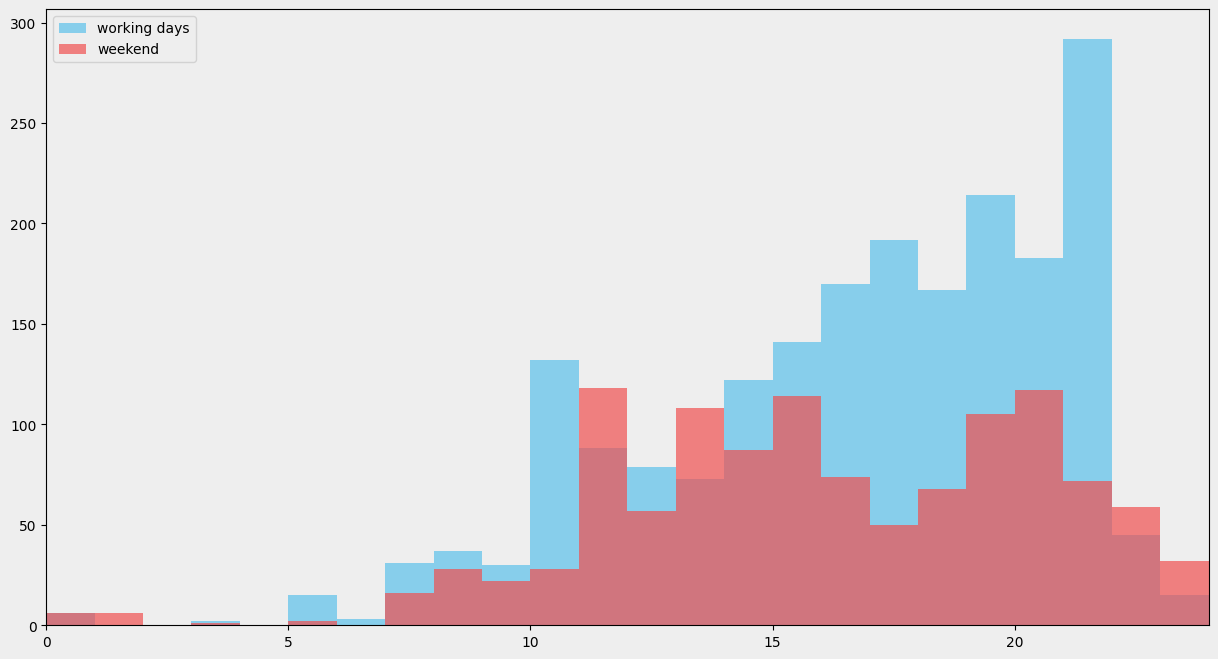

In [5]:
plt.figure(figsize=(15, 8), facecolor="#EEEEEE")
counts_1, bins_1, patches_1 = plt.hist(x=values_1, bins=range(25), color='#87ceeb', alpha=1, label="working days")
counts_2, bins_2, patches_2 = plt.hist(x=values_2, bins=range(25), color='#f05050', alpha=0.7, label="weekend")
plt.gca().set_facecolor("#EEEEEE")
plt.legend().get_frame().set_facecolor("#EEEEEE")
plt.xlim(0, 24)

In [6]:
print(*[counts_1[i] - counts_2[i] for i in range(24)])

0.0 -6.0 0.0 1.0 0.0 13.0 3.0 15.0 9.0 8.0 104.0 -30.0 22.0 -35.0 35.0 27.0 96.0 142.0 99.0 109.0 66.0 220.0 -14.0 -17.0


Are there hours when the total number of commits was higher on weekends than on working days?
<br>
Answer: **(13, 11, 23, 22)**

## Закрываем соединение с базой данных

In [7]:
connection.close()

# Exercise 05 : Boxplot

## Problems for this exercise

Remember how we tried to figure out if the newsfeed affected the behavior of the test and control users? Last time, we just calculated the average values. But do we know something about the variances? What if it changed too? What if we had some outliers?

To answer those questions it may be handy to draw a boxplot

* do what you need to do to create a graph like this:

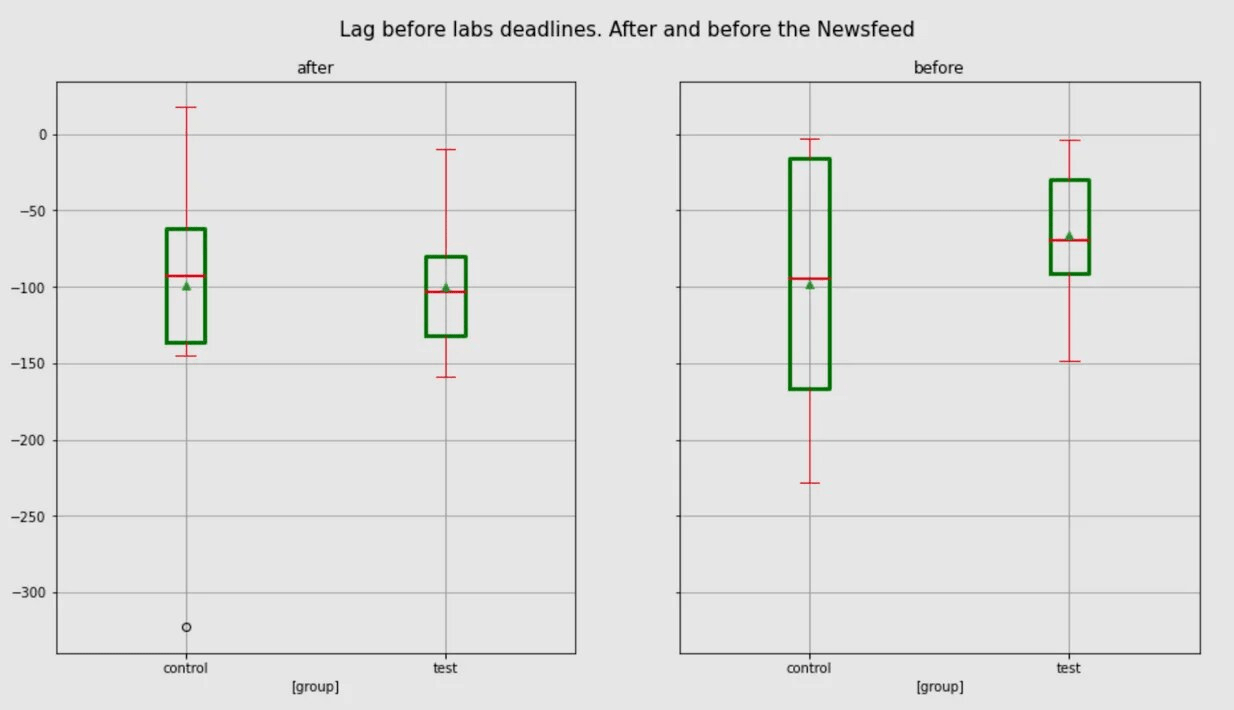

* use the data from the file, read it to a dataframe and make any modification that you may find useful to solve the task
* the figsize is still the same, you can choose whatever fontsize you like
* the color palette should be the same as in the example
* the fontsize of the title is 15
* the width of the box lines is 3, the width of the median lines is 2
* at the end of your Jupyter Notebook, create a markdown cell and insert the question:
    * “What was the IQR of the control group before the newsfeed?” In your answer, put the approximate value that you can get just by looking at the graph, round it to the nearest 10

### Импорт разрешенных библиотек

In [1]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

## Импортируем необходимые данные csv файла

In [2]:
data = pd.read_csv("./data/ab-test.csv", header=0, sep=',')

test_values_before = data[(data["time"] == "before") & (data["group"] == "test")]["diff"].values
test_values_after = data[(data["time"] == "after") & (data["group"] == "test")]["diff"].values
control_values_before = data[(data["time"] == "before") & (data["group"] == "control")]["diff"].values
control_values_after = data[(data["time"] == "after") & (data["group"] == "control")]["diff"].values

## Строим boxplot-ы из полученных данных

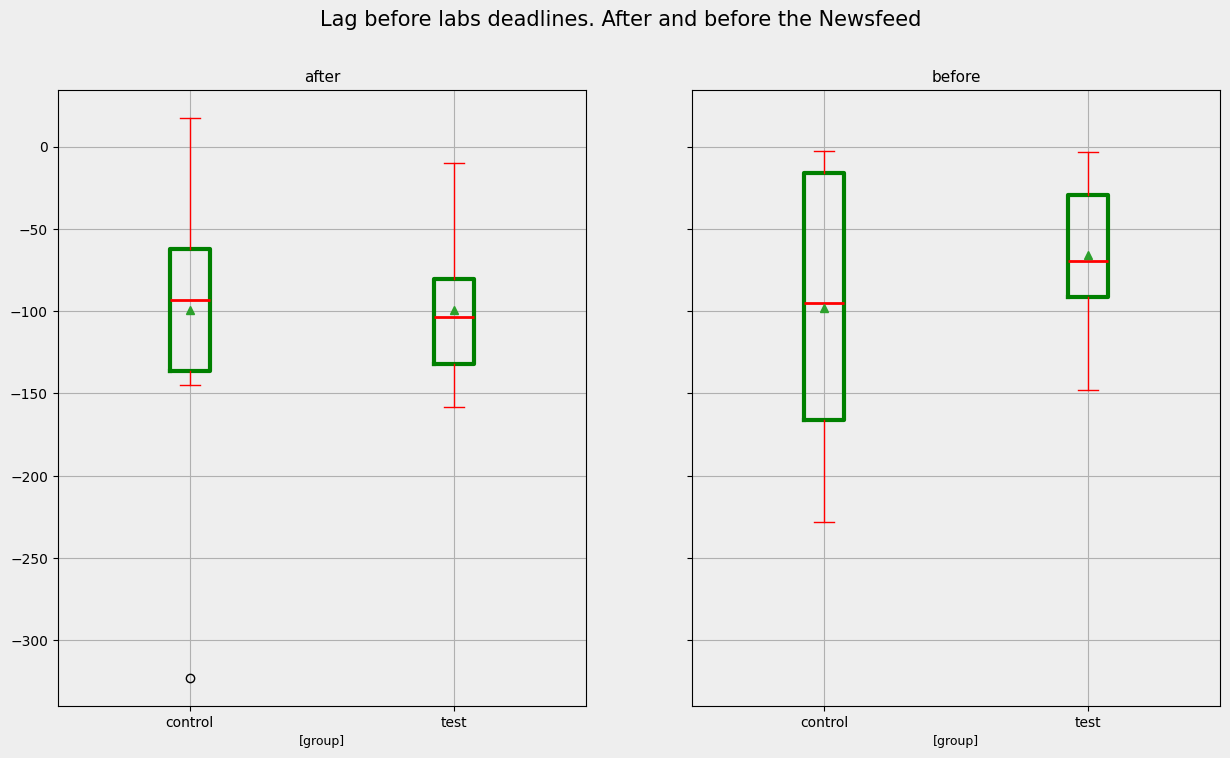

In [3]:
def build_ax(ax_obj, values, title_name):
    ax_obj.boxplot(x=values, showmeans=True, medianprops={"color": "red", "linewidth": 2}, boxprops={"color": "green", "linewidth": 3}, whiskerprops={"color": "red"}, capprops={"color": "red"}, tick_labels=["control", "test"])
    ax_obj.grid()
    ax_obj.set_title(title_name, fontsize=11)
    ax_obj.set_xlabel("[group]", fontsize=9)


fig, ax = plt.subplots(nrows=1, ncols=2, sharey=True, subplot_kw={"facecolor": "#EEEEEE"}, figsize=(15,8), facecolor="#EEEEEE")
fig.suptitle("Lag before labs deadlines. After and before the Newsfeed", fontsize=15)
build_ax(ax[0], [control_values_after, test_values_after], "after")
build_ax(ax[1], [control_values_before, test_values_before], "before")

What was the IQR of the control group before the newsfeed?
<br>
Answer: **150**

# Exercise 06 : Scatter Matrix


### Импорт разрешенных библиотек

In [7]:
import pandas as pd
import sqlite3
from pandas.plotting import scatter_matrix

## Problems for this project

Remember how we tried to find out if there was a correlation between the number of visits to the Newsfeed and the average difference between the first commit and the lab deadline? The problem is that the correlation coefficient shows whether there is a linear relationship between the two variables. But what if it is not linear? How can we see that? That’s right – by drawing graphs!

* do what you need to do to create a graph like this:

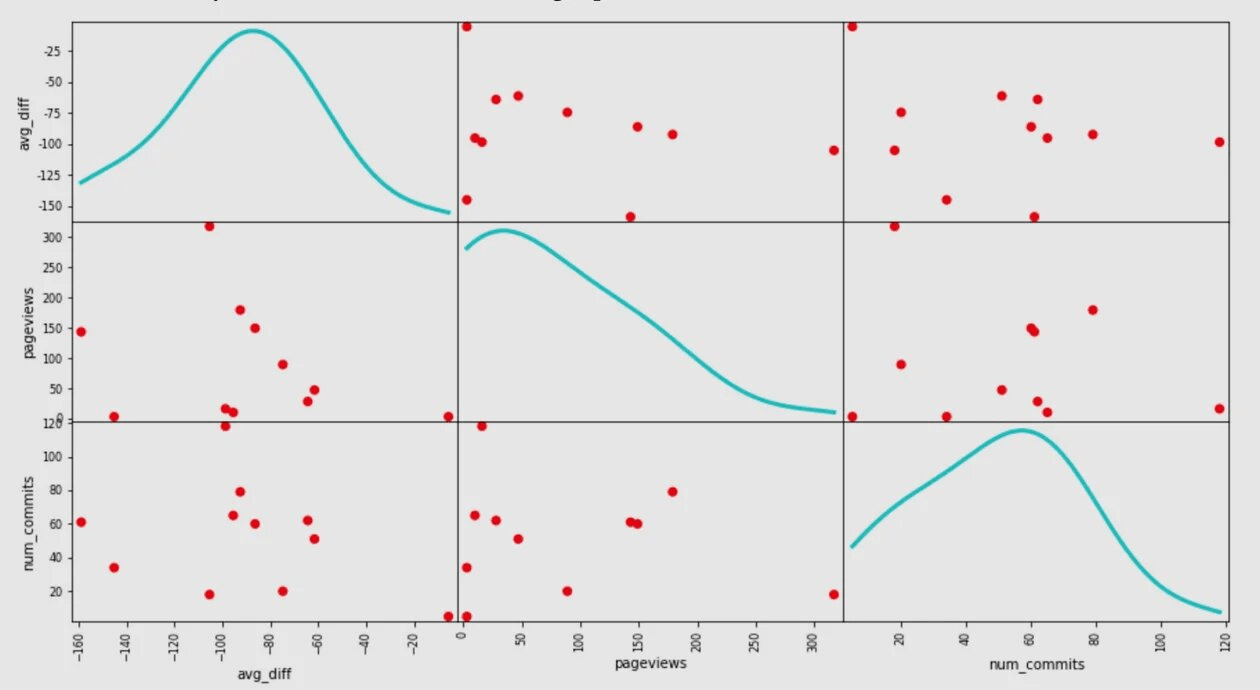

* create a dataframe where each user of the test group has the average difference, number of pageviews and number of commits
* do not take project1 into account for calculations of the average difference and the number of commits
* take the number of commits from the checker table
* the figsize is still the same, you can choose whatever fontsize you like as well as the color palette
* the size of the dots should be 200
* the width of the lines of the diagonal graphs (kde) should be 3
* at the end of your Jupyter Notebook, create a markdown cell and insert the questions:
    * “Can we say that if a user has a low number of pageviews then they likely have a low number of commits?” The answer: yes or no.
    * “Can we say that if a user has a low number of pageviews then they likely have a small average difference between the first commit and the lab deadline?” The answer: yes or no.
    * “Can we say that there are many users with a low number of commits and a few with a high number of commits”? The answer: yes or no.
    * “Can we say that there are many users with a small average difference and a few with a large average difference”? The answer: yes or no.

## Подключаемся к базе данных (также и к старой из предыдущего дня)

In [8]:
connection = sqlite3.connect("./data/checking-logs.sqlite")
connection_to_prev_day = sqlite3.connect("./data/old_database.sqlite")

## Получаем среднюю разницу и количество просмотров страницы

In [9]:
query = '''
        SELECT a.uid, b.avg_diff, a.pageviews
        FROM (SELECT uid, AVG(delta) as avg_diff
             FROM (SELECT test.uid AS uid, CAST((CAST(strftime('%s', test.first_commit_ts) AS INTEGER) - deadlines.deadlines) / 3600 AS FLOAT) AS delta
                   FROM test
                   LEFT JOIN deadlines
                   ON test.labname = deadlines.labs
                   WHERE test.labname != 'project1')
             GROUP BY uid) b
        LEFT JOIN (SELECT uid, COUNT(*) as pageviews
                   FROM pageviews
                   WHERE uid LIKE '%user_%'
                   GROUP BY uid) a
        ON a.uid = b.uid
        '''
pageviews_and_avg = pd.read_sql(con=connection_to_prev_day, sql=query)
pageviews_and_avg

,uid,avg_diff,pageviews
0,user_1,-64.400000,28
1,user_10,-74.800000,89
2,user_14,-159.000000,143
3,user_17,-61.600000,47
4,user_18,-5.666667,3
5,user_19,-98.750000,16
6,user_21,-95.500000,10
7,user_25,-92.600000,179
8,user_28,-86.400000,149
9,user_3,-105.400000,317


## Извлекаем количество коммитов на каждого пользователя и объединяем данные

In [10]:
query = '''
        SELECT uid, timestamp
        FROM checker
        WHERE
            uid IN ('user_1', 'user_10', 'user_14', 'user_17', 'user_18','user_19', 'user_21', 'user_25', 'user_28', 'user_3', 'user_30')
            AND labname != "project1";
        '''
commit_data = pd.read_sql(con=connection, sql=query)
number_of_commits = commit_data.groupby(by="uid")["timestamp"].count().reset_index(name="num_commits")
full_data = pd.merge(pageviews_and_avg, number_of_commits, on="uid", how="left")
full_data.drop(columns="uid", axis=1, inplace=True)
full_data

,avg_diff,pageviews,num_commits
0,-64.400000,28,62
1,-74.800000,89,20
2,-159.000000,143,61
3,-61.600000,47,51
4,-5.666667,3,5
5,-98.750000,16,118
6,-95.500000,10,65
7,-92.600000,179,79
8,-86.400000,149,60
9,-105.400000,317,18


## Используя scatter_matrix строим матрицу рассеивания

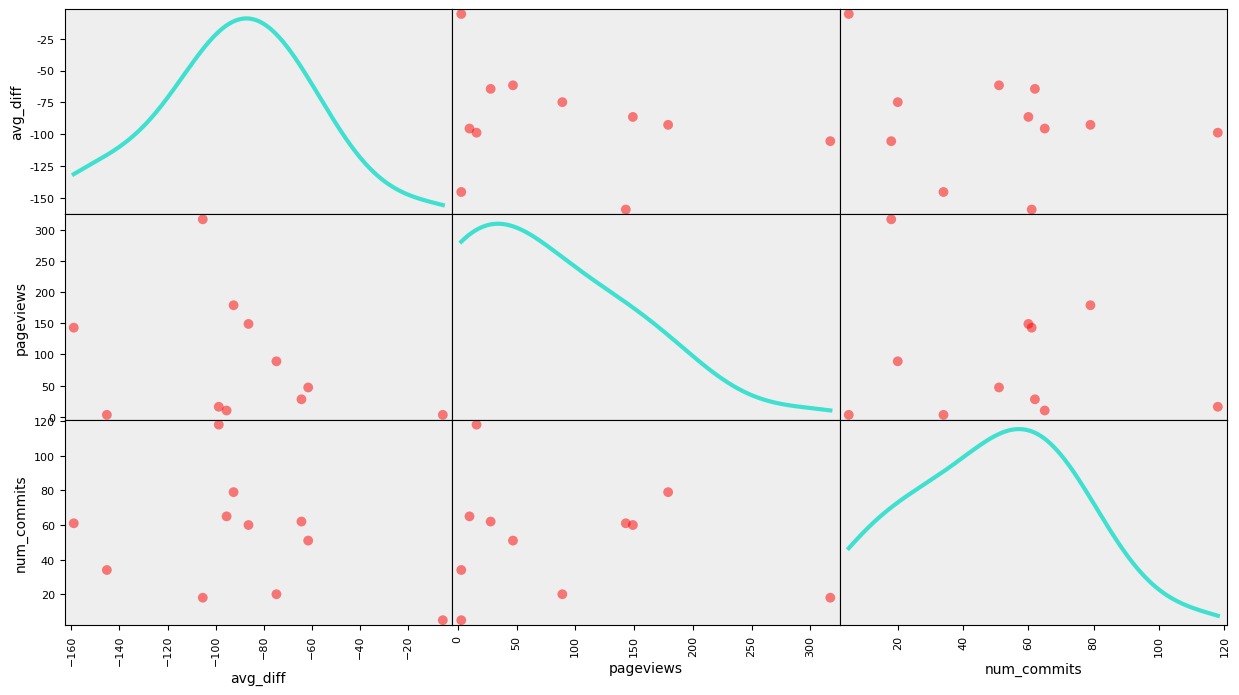

In [11]:
axes = scatter_matrix(full_data, figsize=(15,8), diagonal="kde", color="red")
for ax in axes.flatten():
    ax.set_facecolor("#EEEEEE")

    if len(ax.lines) > 0:
        for line in ax.lines:
            line.set_color("#40e0d0")
            line.set_linewidth(3)
    else:
        for scatter_plot in ax.collections:
            scatter_plot.set_sizes([200])

## Разрываем оба соединения

In [12]:
connection.close()
connection_to_prev_day.close()

Can we say that if a user has a low number of pageviews then they likely
have a low number of commits?
<br>
The answer: no
<br>
<br>
Can we say that if a user has a low number of pageviews then they likely have
a small average difference between the first commit and the lab deadline?
<br>
The answer: no
<br>
<br>
Can we say that there are many users with a low number of commits and a
few with a high number of commits?
<br>
The answer: no
<br>
<br>
Can we say that there are many users with a small average difference and a
few with a large average difference?
<br>
The answer: no

# Exercise 07 : Heatmap

## Problems for this exercise

Several exercises back, we wanted to see if there are different patterns for users during working days and weekends. In this exercise, let us find out if there are different patterns for users between different weekdays and between different hours.

* analyze only the users and not the admins
* you can choose the color palette that you like for both of the graphs that you will need to draw in this exercise
* use the table checker for your query
* use absolute values of the commits, not the averages
* sort the dataframes by the total number of commits made by a user
* (at the end of your Jupyter Notebook create a markdown cell and insert the questions (answer them looking only at the graphs):
    * “Which user has the most commits on Tue?” The answer: user_*.
    * “Which user has the most commits on Thu?” The answer: user_*.
    * “On which weekday do the users not like making a lot of commits?” The answer, for example: Mon.
    * “Which user at which hour made the largest number of commits?” The answer, for example: user_1, 15
* do what you need to do to create two graphs like this:

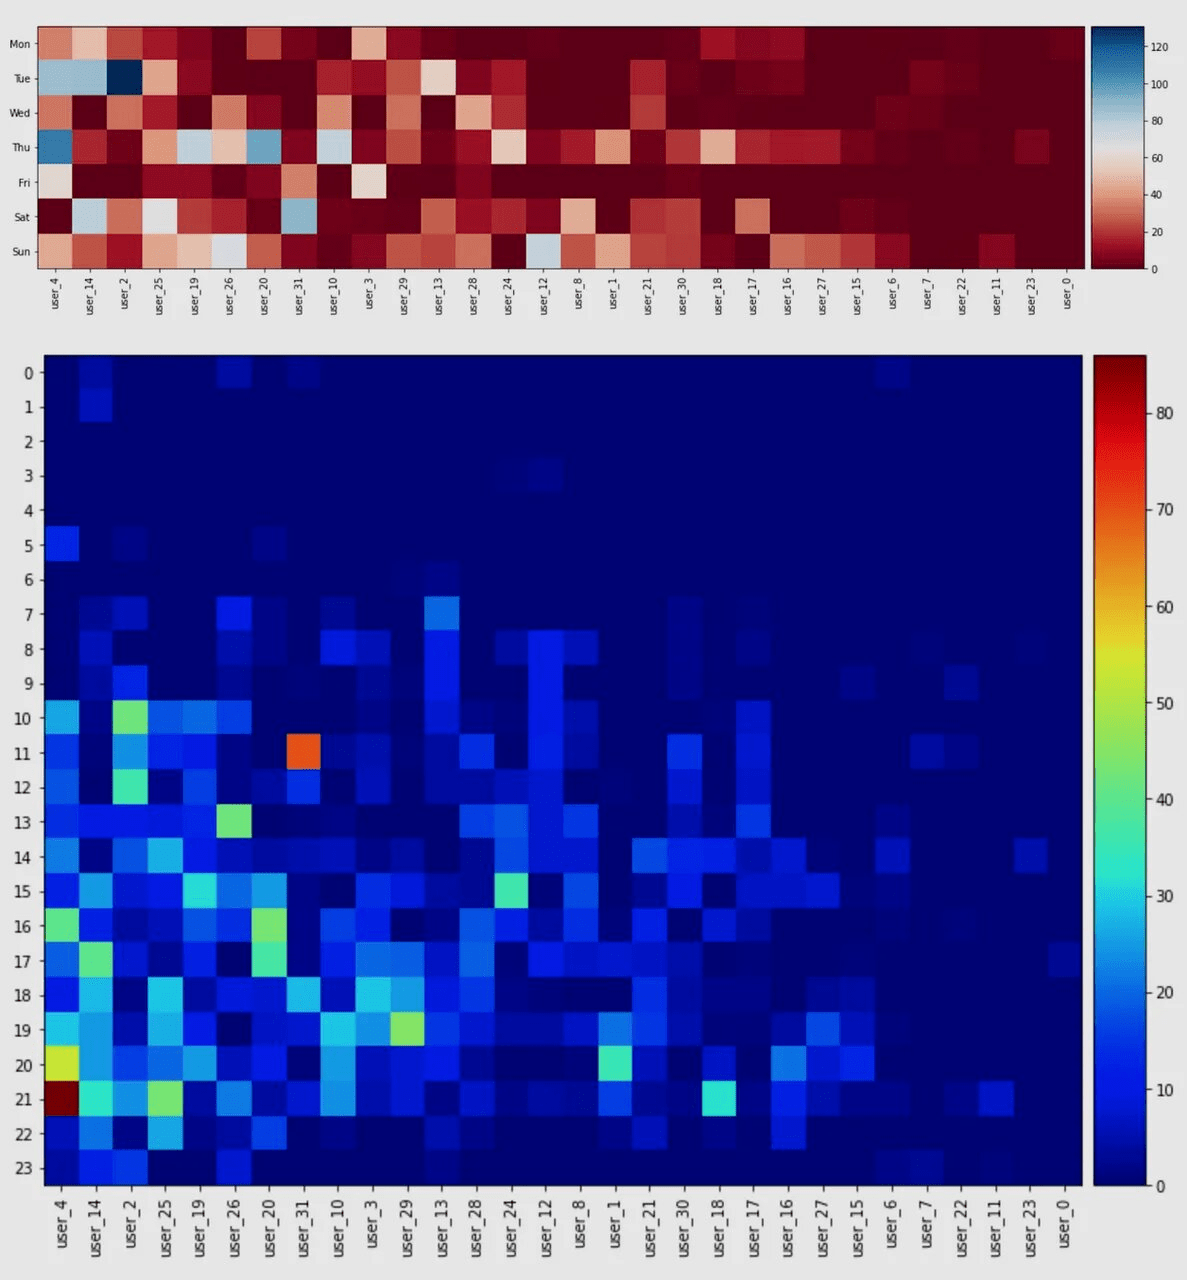

### Импорт разрешенных библиотек

In [1]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

## Подключаемся к базе данных

In [2]:
connection = sqlite3.connect("./data/checking-logs.sqlite")

## С помощью SQL-запрос получаем нужные данные для первого графика

In [3]:
query = '''
        SELECT
            uid,
            CASE CAST(strftime("%w", timestamp) AS INTEGER)
                WHEN 0 THEN "Sun"
                WHEN 1 THEN "Mon"
                WHEN 2 THEN "Tue"
                WHEN 3 THEN "Wed"
                WHEN 4 THEN "Thu"
                WHEN 5 THEN "Fri"
                WHEN 6 THEN "Sat"
                ELSE "Sun"
            END AS day_of_week,
            COUNT(*) AS count
        FROM checker
        WHERE uid LIKE "%user_%"
        GROUP BY
            uid,
            CASE CAST(strftime("%w", timestamp) AS INTEGER)
                WHEN 0 THEN "Sun"
                WHEN 1 THEN "Mon"
                WHEN 2 THEN "Tue"
                WHEN 3 THEN "Wed"
                WHEN 4 THEN "Thu"
                WHEN 5 THEN "Fri"
                WHEN 6 THEN "Sat"
                ELSE "Sun"
            END;
        '''
data_1 = pd.read_sql(con=connection, sql=query)

all_uids = data_1["uid"].unique()
all_day_of_week = ["Sun", "Mon", "Tue", "Wed", "Thu", "Fri", "Sat"]
all_combinations = pd.MultiIndex.from_product([all_uids, all_day_of_week], names=["uid", "day_of_week"]).to_frame(index=False)
merged_data = pd.merge(all_combinations, data_1, on=["uid", "day_of_week"], how="left").fillna(0)

pivoted_data_1 = merged_data.pivot_table(values="count", index="day_of_week", columns="uid")

column_sums = pivoted_data_1.sum().reset_index(name="value")
sorted_columns_1 = column_sums.sort_values(by=["value", "uid"], ascending=False)["uid"].tolist()
sorted_data_1 = pivoted_data_1[sorted_columns_1]

sorted_data_1.reset_index(inplace=True)
days_order = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]
sorted_data_1["day_of_week"] = pd.Categorical(sorted_data_1["day_of_week"], categories=days_order, ordered=True)
final_data_1 = sorted_data_1.sort_values("day_of_week").set_index("day_of_week")

final_data_1

/tmp/ipykernel_355146/4196575874.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sorted_data_1["day_of_week"] = pd.Categorical(sorted_data_1["day_of_week"], categories=days_order, ordered=True)


uid,user_4,user_14,user_2,user_25,user_19,user_26,user_20,user_31,user_10,user_3,...,user_17,user_16,user_27,user_15,user_6,user_7,user_22,user_11,user_23,user_0
day_of_week,,,,,,,,,,,,,,,,,,,,,
Mon,35.0,50.0,24.0,14.0,7.0,0.0,23.0,5.0,0.0,46.0,...,8.0,10.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,3.0
Tue,86.0,87.0,131.0,44.0,9.0,1.0,0.0,0.0,16.0,11.0,...,4.0,5.0,0.0,0.0,0.0,5.0,3.0,0.0,0.0,0.0
Wed,33.0,0.0,32.0,15.0,0.0,34.0,8.0,0.0,37.0,0.0,...,1.0,0.0,0.0,0.0,4.0,3.0,0.0,0.0,0.0,0.0
Thu,108.0,17.0,4.0,40.0,78.0,51.0,96.0,7.0,77.0,7.0,...,17.0,14.0,15.0,5.0,2.0,0.0,2.0,0.0,6.0,0.0
Fri,61.0,0.0,0.0,10.0,10.0,2.0,7.0,35.0,1.0,59.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Sat,0.0,79.0,31.0,66.0,21.0,16.0,3.0,90.0,4.0,3.0,...,32.0,0.0,0.0,4.0,2.0,0.0,0.0,0.0,0.0,0.0
Sun,45.0,26.0,13.0,44.0,51.0,69.0,28.0,7.0,2.0,8.0,...,0.0,31.0,27.0,20.0,9.0,0.0,1.0,8.0,0.0,0.0


## С помощью SQL-запроса получаем нужные данные для второго графика

In [4]:
query = '''
        SELECT
            uid,
            hour,
            COUNT(*) AS count
        FROM
            (SELECT 
                 uid,
                 CAST(strftime("%H", timestamp) AS INTEGER) AS hour
             FROM checker
             WHERE uid LIKE "%user_%")
        GROUP BY uid, hour
        '''
data_2 = pd.read_sql(con=connection, sql=query)

all_combinations = pd.MultiIndex.from_product([all_uids, range(24)], names=["uid", "hour"]).to_frame(index=False)
merged_data = pd.merge(all_combinations, data_2, on=["uid", "hour"], how="left").fillna(0)

pivoted_data_2 = merged_data.pivot_table(index="hour", values="count", columns="uid")

column_sums = pivoted_data_2.sum().reset_index(name="value")
sorted_columns_2 = column_sums.sort_values(by=["value", "uid"], ascending=False)["uid"].tolist()
final_data_2 = pivoted_data_2[sorted_columns_2]
final_data_2

uid,user_4,user_14,user_2,user_25,user_19,user_26,user_20,user_31,user_10,user_3,...,user_17,user_16,user_27,user_15,user_6,user_7,user_22,user_11,user_23,user_0
hour,,,,,,,,,,,,,,,,,,,,,
0,0.0,4.0,0.0,0.0,0.0,4.0,0.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
1,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,13.0,0.0,2.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,3.0,6.0,0.0,0.0,10.0,2.0,0.0,3.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,6.0,0.0,0.0,0.0,5.0,2.0,0.0,9.0,6.0,...,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


## Строим необходимые данные на основе полученных данных

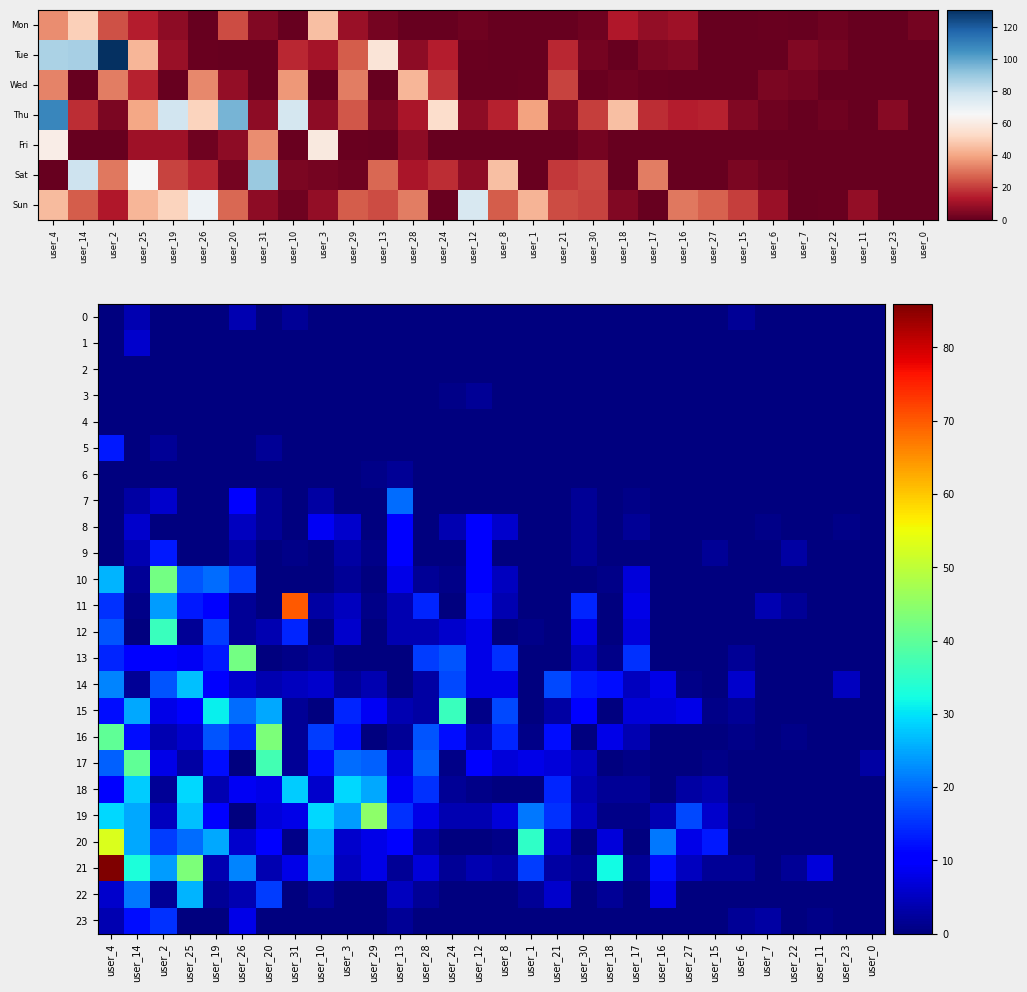

In [5]:
fig, axes = plt.subplots(2, 1, gridspec_kw={'height_ratios': [2, 6]}, figsize=(15,12))
fig.set_facecolor("#EEEEEE")
ax_1, ax_2 = axes

im_1 = ax_1.imshow(final_data_1, cmap="RdBu", aspect='equal')
ax_1.set_xticks(range(30))
ax_1.set_xticklabels(sorted_columns_1, rotation=90, fontsize=6)
ax_1.set_yticks(range(7))
ax_1.set_yticklabels(days_order, fontsize=6)

im_2 = ax_2.imshow(final_data_2, cmap="jet", aspect='equal')
ax_2.set_xticks(range(30))
ax_2.set_xticklabels(sorted_columns_2, rotation=90, fontsize=7)
ax_2.set_yticks(range(24))
ax_2.set_yticklabels(range(24), fontsize=7)

divider_1 = make_axes_locatable(ax_1)
cax_1 = divider_1.append_axes("right", size="5%", pad="1%")
colorbar_1 = plt.colorbar(im_1, cax=cax_1)
colorbar_1.ax.tick_params(labelsize=6)

divider_2 = make_axes_locatable(ax_2)
cax_2 = divider_2.append_axes("right", size="5%", pad="1%")
colorbar_2 = plt.colorbar(im_2, cax=cax_2)
colorbar_2.ax.tick_params(labelsize=7)

## Разрываем соединения с базой данных

In [6]:
connection.close()

Which user has the most commits on Tue?
<br>
The answer: user_2
<br>
<br>
Which user has the most commits on Thu?
<br>
The answer: user_4
<br>
<br>
On which weekday do the users not like making a lot of commits?
<br>
The answer: Fri
<br>
<br>
Which user at which hour made the largest number of commits?
<br>
The answer: (user_4, 21:00)

# Exercise 08 : Seaborn

## Problems for this exercise

Ok, sometimes in the previous exercises we ignored project1 in our calculations. The project was a competition. It had longer deadlines and much more commits than ordinary labs had. Let us see the dynamic of commits in this project per user. This time we will use another library for data visualization in Python – Seaborn. In general, it is much easier to create something beautiful in that library.

* do what you need to do to create a graph like this:

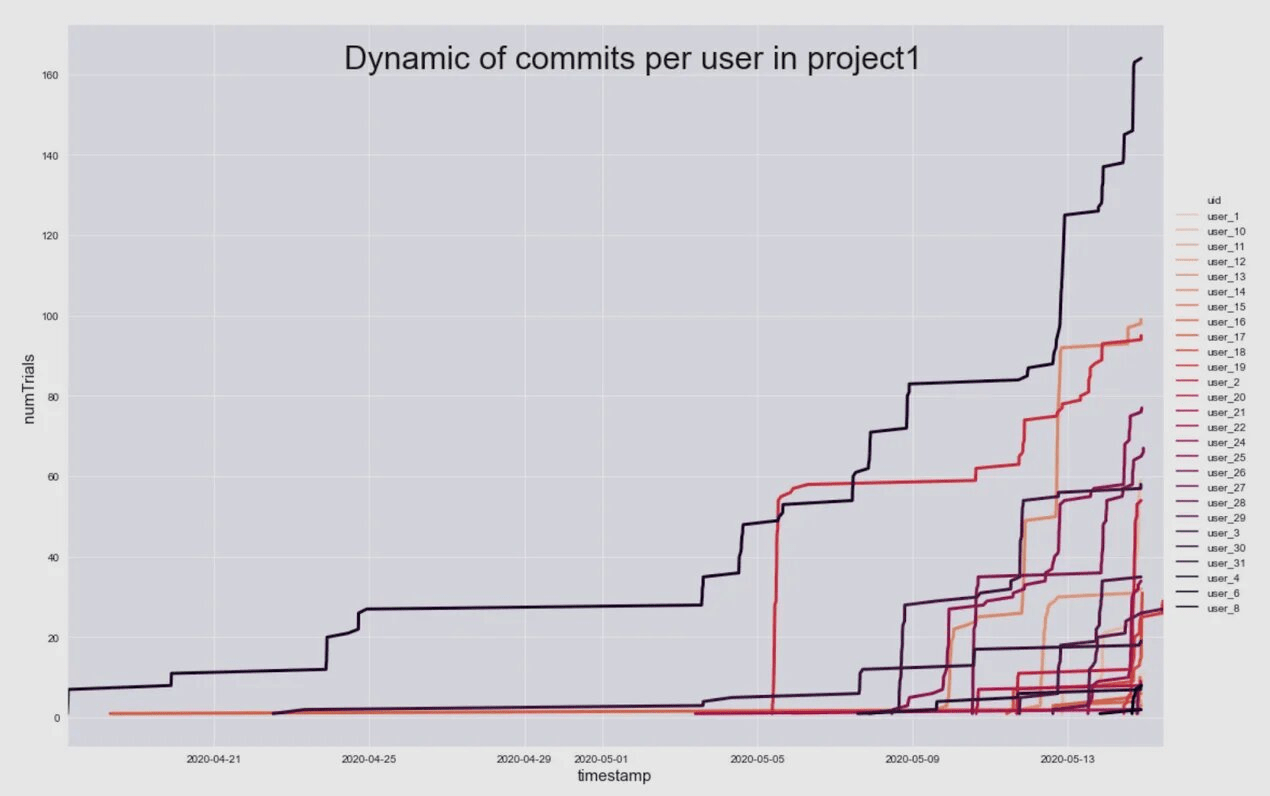

* analyze only the users and not the admins
* take into account only logs from the table checker where the status is ready
* you can choose the palette that you enjoy
* the linewidth should be 3
* the background of the graph is gray
* the height should be 10, and the width should 1.5x in relation to the height
* the fontsize of the title should be 30
* the fontsize of the axises labels is 15
* at the end of your Jupyter Notebook create a markdown cell and insert the questions (answer them looking only at the graphs):
    * “Which user was the leader in the number of commits almost all of the time?” The answer: user_*.
    * “Which user was the leader for only a short period of time?” The answer: user_*

### Импорт разрешенных библиотек

In [1]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

## Поключаемся к базе данных

In [2]:
connection = sqlite3.connect("./data/checking-logs.sqlite")

## Получаем нужные данные из базы с помощью запроса

In [3]:
query = '''
        SELECT uid, timestamp, numTrials
        FROM checker
        WHERE uid LIKE '%user_%' AND status = "ready" AND labname = "project1"
        ORDER BY uid
        '''
data = pd.read_sql(con=connection, sql=query, parse_dates=["timestamp"])
data

,uid,timestamp,numTrials
0,user_1,2020-05-14 20:56:08.898880,1
1,user_1,2020-05-14 20:58:02.313690,2
2,user_1,2020-05-14 20:58:46.322457,3
3,user_1,2020-05-14 21:08:15.434237,4
4,user_1,2020-05-14 21:10:14.867603,5
...,...,...,...
946,user_8,2020-05-14 16:18:00.528528,4
947,user_8,2020-05-14 16:41:03.916147,5
948,user_8,2020-05-14 17:40:47.781946,6
949,user_8,2020-05-14 17:46:54.469822,7


## Строим график в соответствии с данными

(np.float64(18369.221559543148), np.float64(18397.45305465661))

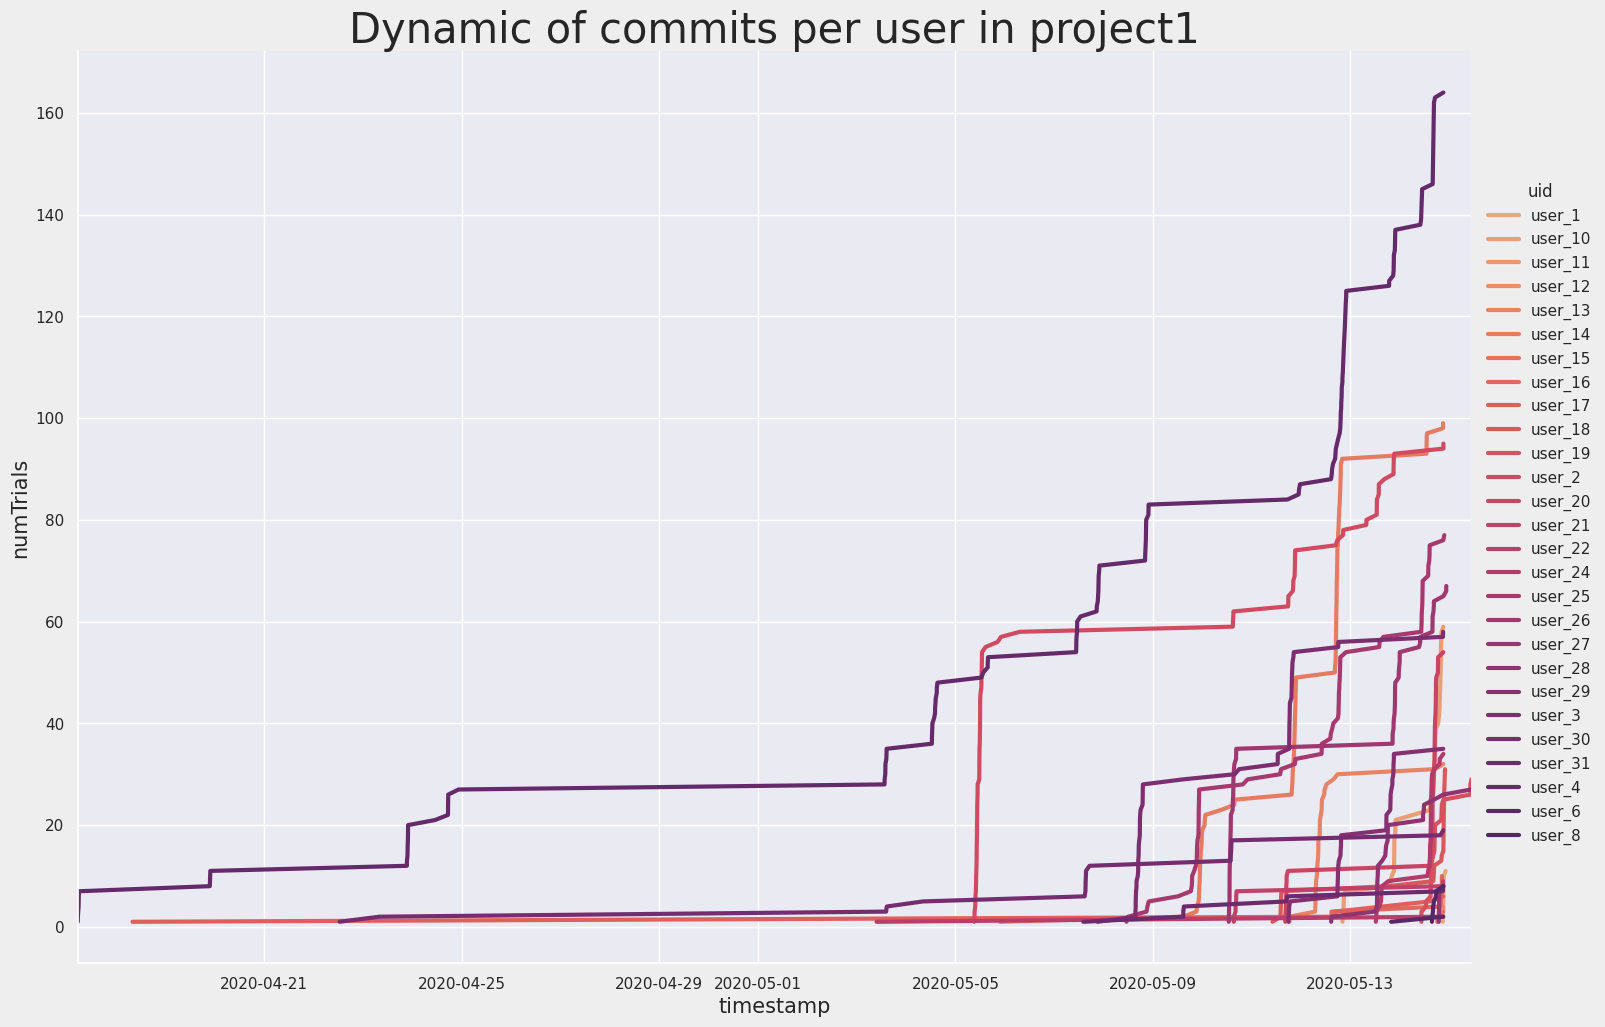

In [4]:
sns.set(rc={"lines.linewidth": 3})
sns.relplot(data=data, x="timestamp", y="numTrials", legend="full", hue="uid", kind="line", height=10, aspect=1.5, palette="flare")
plt.gcf().set_facecolor("#EEEEEE")
plt.gca().set_xlabel("timestamp", fontsize=15)
plt.gca().set_ylabel("numTrials", fontsize=15)
plt.gca().set_title("Dynamic of commits per user in project1", fontsize=30)
plt.xlim(pd.Timestamp('2020-04-17 05:19:02.744528'), pd.Timestamp('2020-05-15 10:52:23.922331'))

### Разрываем подключение с базой данных

In [5]:
connection.close()

Which user was the leader in the number of commits almost all of the time?
<br>
The answer: user_4
<br>
<br>
Which user was the leader for only a short period of time?
<br>
The answer: user_2

# Exercise 09 : Plotly

## Problems for this exercise

Matplotlib and Seaborn are really powerful libraries and you can use them for most of the tasks that you may have related to DataViz. But they do not offer you the functionality of creating interactive charts and animations. And Plotly can help you with that. In this exercise, you will need to create almost the same graph as in the previous exercise but in an animation.

* do what you need to do to create a graph like this:

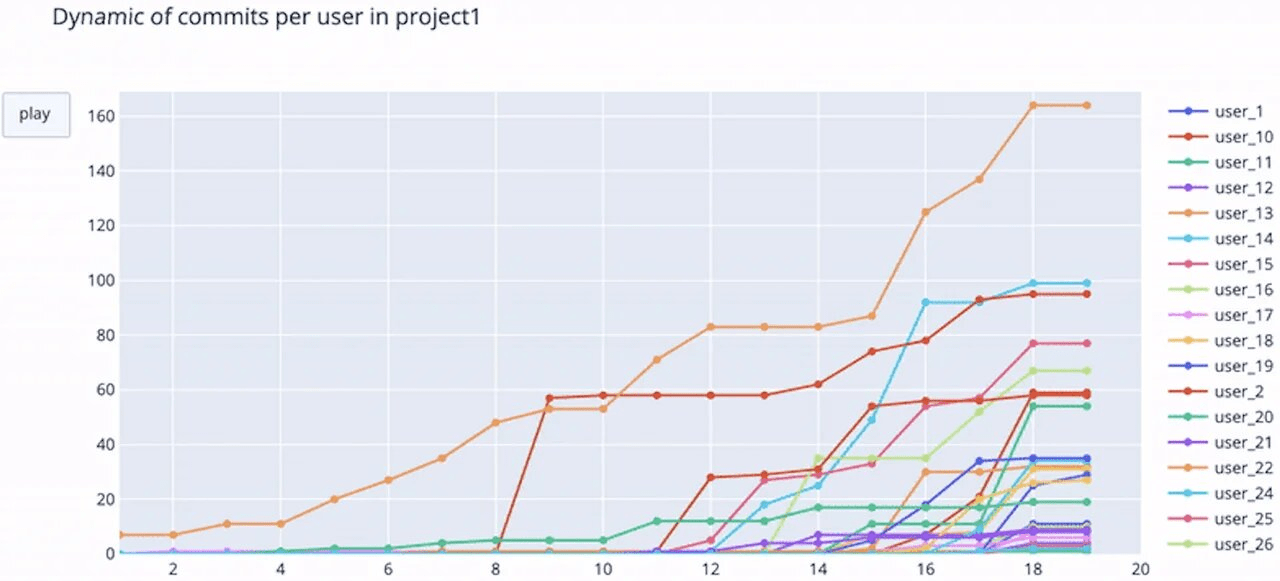

* it is not an easy task, and it is hard to find good and clear tutorials, so use this [link](https://github.com/datageekrj/YouTubeChannelHostingFiles/blob/master/lineRace.py) as a reference

### Импорт разрешенных библиотек

In [1]:
import pandas as pd
import sqlite3
import plotly.graph_objects as go
import numpy as np

## Подключаемся к базе данных

In [2]:
connection = sqlite3.connect("./data/checking-logs.sqlite")

## С помощью запроса к базе данных получаем данные

In [3]:
query = '''
        SELECT uid, date(timestamp) AS timestamp, MAX(numTrials) AS numTrials
        FROM checker
        WHERE uid LIKE '%user_%' AND status = "ready" AND labname = "project1"
        GROUP BY uid, date(timestamp)
        '''
raw_data = pd.read_sql(con=connection, sql=query, parse_dates=["timestamp"])

pivoted_data = raw_data.pivot_table(values="numTrials", index="uid", columns="timestamp")

pivoted_data.ffill(axis=1, inplace=True)
data = pivoted_data.fillna(value=0.0)

data

timestamp,2020-04-17,2020-04-18,2020-04-19,2020-04-22,2020-04-23,2020-04-24,2020-05-03,2020-05-04,2020-05-05,2020-05-06,2020-05-07,2020-05-08,2020-05-09,2020-05-10,2020-05-11,2020-05-12,2020-05-13,2020-05-14,2020-05-15
uid,,,,,,,,,,,,,,,,,,,
user_1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,11.0
user_10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,21.0,59.0,59.0
user_11,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
user_12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0
user_13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,30.0,30.0,32.0,32.0
user_14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,18.0,25.0,49.0,92.0,92.0,99.0,99.0
user_15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0
user_16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,10.0,10.0
user_17,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,3.0,6.0,6.0


## Определяем параметры

In [4]:
numOfRows, numOfCols = data.shape
numOfFrames = numOfCols
x_axis_range = [0, numOfFrames]
y_axis_range = [0, 170]

## Инициализируем начальные значения

In [5]:
initial_data = [go.Scatter(x=np.array([]), y=np.array([]), mode="lines+markers", name=name) for name in data.index]

## Создаём фреймы анимации

In [6]:
frames = []
for f in range(numOfFrames + 1):
    x_axis, curr_data = np.arange(f + 1), []
    for index in range(numOfRows):
        curr_user = data.index[index]
        y_axis = np.array(data.iloc[index, :(f + 1)])
        curr_data.append(go.Scatter(x=x_axis, y=y_axis, mode="lines+markers", name=curr_user))
    
    curr_frame = go.Frame(data=curr_data, layout={"title": "Dynamic of commits per user in project1"})
    frames.append(curr_frame)

## Создаем фигуру и отрисовываем её

In [7]:
figure = go.Figure(
    data = initial_data,
    layout = {
        "title":"Dynamic of commits per user in project1",
        "width": 1200,
        "height": 600,
        "xaxis":{"range": x_axis_range},
        "yaxis":{"range": y_axis_range},
        "updatemenus":[{"type":"buttons","buttons":[{"method":"animate","label":"play", "args":[None]}]}],
        },
    frames = frames)

figure.show()

## Разрываем подключение с базой данных

In [8]:
connection.close()